In [385]:
import datetime
import pandas as pd
from tensorflow.python.keras.layers.core import Dropout
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re 
import matplotlib.pyplot as plt
import random
from pandas_datareader import data
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 1500)



In [ ]:
news_data = pd.read_excel("newsDb.xlsx") 
# print(news_data.head())
# print(news_data.head())
historical_data = pd.read_excel("finaceDbTSLA.xlsx")
# print(historical_data.head())

merged_data = news_data.merge(historical_data, left_on='dateTime', right_on='Date') #merge two data frame
# print(merged_data.head())#show a couples of merged data.
merged_data.to_excel("deneme.xlsx")

In [ ]:

headlines= []
for row in range(0, len(merged_data.index)):
    headlines.append(' '.join(str(x) for x in merged_data.iloc[row, 1:11]))
# print(headlines[0])

clean_headlines = []
for i in range(0, len(headlines)):
  clean_headlines.append(re.sub("b[(')]", '', headlines[i]))
  clean_headlines[i] = re.sub('b[(")]', '', headlines[i])
  clean_headlines[i] = re.sub("\'", '', headlines[i]) #replace ' && " with nulls.
# print(clean_headlines[0])
# print(len(clean_headlines))  #headline içerisinde nan yazıları kaldırılmalı!

merged_data['Combined_News'] = clean_headlines

In [ ]:

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity 

In [ ]:

merged_data['Subjectivity']=merged_data['article'].apply(getSubjectivity)
merged_data['Polarity']=merged_data['article'].apply(getPolarity)
print(merged_data)


      dateTime                                                 H1  \
0   2021-12-14  California senator scrutinizing Tesla’s Full S...   
1   2021-12-13  Ticker: Time names Elon Musk “Person of the Ye...   
2   2021-12-10  North Carolina chases more success at home vs....   
3   2021-12-09  Drivers playing video games? U.S. is looking i...   
4   2021-12-08  BofA Explains Neutral Rating for Tesla, Buy fo...   
5   2021-12-07  Tesla's Musk says Biden's electric vehicle bil...   
6   2021-12-06  Interview With Cassava Sciences' CEO Remi Barb...   
7   2021-12-03  Robeco Institutional Asset Management B.V. Low...   
8   2021-12-02  Mirrored Tesla Tops 24 Hour Trading Volume of ...   
9   2021-12-01  Tesla officially moves headquarters from Calif...   
10  2021-11-30  Cramer's Mad Money Recap 11/30: Amazon, Micros...   
11  2021-11-29  Elon Musk’s California exit can save him $2 bi...   
12  2021-11-26  Great Valley Advisor Group Inc. Has $4.10 Mill...   
13  2021-11-24  Musk sells more th

In [ ]:
def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

In [ ]:
compound=[]
SIA=0
for i in range(0,len(merged_data['Combined_News'])):
    SIA = getSIA(merged_data['Combined_News'][i])
    compound.append(SIA['compound'])

In [ ]:
merged_data['Compound']=compound


In [ ]:
merged_data.to_excel('merged_data_tesla4.xlsx')


In [466]:
merged_data = pd.read_excel("final_data.xlsx")

In [467]:
keep_columns=['Open','High','Low','Volume','Subjectivity','Polarity','Compound']    


In [468]:
all_close_values = np.array(merged_data['Close'])


In [469]:
all_close_values

array([ 332.799988,  310.119995,  300.359985,  317.690002,  334.959991,
        335.350006,  338.529999,  344.970001,  347.26001 ,  334.399994,
        344.429993,  346.049988,  347.309998,  302.26001 ,  298.920013,
        287.589996,  291.51001 ,  297.040009,  296.380005,  297.459991,
        308.769989,  307.019989,  312.209991,  312.890015,  321.350006,
        317.220001,  307.51001 ,  305.799988,  312.839996,  311.809998,
        308.170013,  303.769989,  307.880005,  305.640015,  302.559998,
        291.230011,  294.709991,  298.769989,  297.859985,  314.73999 ,
        319.880005,  294.790009,  285.359985,  276.540009,  276.23999 ,
        276.589996,  284.140015,  290.920013,  283.359985,  288.959991,
        289.959991,  275.429993,  269.48999 ,  267.470001,  273.600006,
        274.019989,  264.529999,  260.420013,  267.769989,  274.829987,
        278.619995,  279.859985,  289.179993,  285.880005,  291.809998,
        267.779999,  274.959991,  273.200012,  272.309998,  276.

In [470]:
all_close_values.shape

(746,)

In [471]:
all_input_values=merged_data[keep_columns].values #numpy array.

In [472]:
all_input_values

array([[ 3.37790009e+02,  3.39209991e+02,  3.25260010e+02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.06100006e+02,  3.15130005e+02,  2.98799988e+02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.07000000e+02,  3.09399994e+02,  2.97380005e+02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.00875000e+03,  1.02097998e+03,  9.82530029e+02, ...,
         5.95344828e-01,  2.19166667e-01,  9.04100000e-01],
       [ 1.00109003e+03,  1.00500000e+03,  9.51419983e+02, ...,
         6.50000000e-01,  1.03409091e-01, -3.19700000e-01],
       [ 9.45000000e+02,  9.66409973e+02,  9.30000000e+02, ...,
         3.57913165e-01,  1.68137255e-01, -9.34900000e-01]])

In [473]:
all_input_values.shape

(746, 7)

In [474]:

training_size=int(len(all_close_values)*0.75)
test_size=len(all_close_values)-training_size
all_input_values_train, all_input_values_test=all_input_values[0:training_size,:],all_input_values[training_size:len(all_input_values),:]

all_close_values_train, all_close_values_test = all_close_values[0:training_size], all_close_values[training_size:len(all_close_values)]

In [475]:
all_close_values_train

array([332.799988, 310.119995, 300.359985, 317.690002, 334.959991,
       335.350006, 338.529999, 344.970001, 347.26001 , 334.399994,
       344.429993, 346.049988, 347.309998, 302.26001 , 298.920013,
       287.589996, 291.51001 , 297.040009, 296.380005, 297.459991,
       308.769989, 307.019989, 312.209991, 312.890015, 321.350006,
       317.220001, 307.51001 , 305.799988, 312.839996, 311.809998,
       308.170013, 303.769989, 307.880005, 305.640015, 302.559998,
       291.230011, 294.709991, 298.769989, 297.859985, 314.73999 ,
       319.880005, 294.790009, 285.359985, 276.540009, 276.23999 ,
       276.589996, 284.140015, 290.920013, 283.359985, 288.959991,
       289.959991, 275.429993, 269.48999 , 267.470001, 273.600006,
       274.019989, 264.529999, 260.420013, 267.769989, 274.829987,
       278.619995, 279.859985, 289.179993, 285.880005, 291.809998,
       267.779999, 274.959991, 273.200012, 272.309998, 276.059998,
       268.420013, 267.700012, 266.380005, 273.359985, 271.230

In [476]:
all_close_values_test

array([ 670.      ,  662.159973,  630.27002 ,  640.390015,  618.710022,
        611.289978,  635.619995,  667.929993,  661.75    ,  691.049988,
        691.619995,  670.969971,  683.799988,  677.02002 ,  701.97998 ,
        762.320007,  732.22998 ,  738.849976,  739.780029,  714.630005,
        718.98999 ,  744.119995,  719.690002,  729.400024,  738.200012,
        704.73999 ,  694.400024,  677.      ,  709.440002,  684.900024,
        673.599976,  670.940002,  663.539978,  672.369995,  629.039978,
        617.200012,  589.890015,  571.690002,  589.73999 ,  576.830017,
        577.869995,  563.460022,  586.780029,  580.880005,  606.440002,
        604.690002,  619.130005,  630.849976,  625.219971,  623.900024,
        605.119995,  572.840027,  599.049988,  605.130005,  603.590027,
        598.780029,  610.119995,  609.890015,  617.690002,  599.359985,
        604.869995,  616.599976,  623.309998,  620.830017,  623.710022,
        656.570007,  679.820007,  671.869995,  688.719971,  680.

In [477]:
print(all_input_values_train.shape, all_input_values_test.shape, all_close_values_train.shape, all_close_values_test.shape)

(559, 7) (187, 7) (559,) (187,)


In [478]:
#scaling
scaler = MinMaxScaler(feature_range=(0,1))
all_input_values_train=scaler.fit_transform(all_input_values_train) # hem fit ediyor hem de scale ediyor. //prediction gerceklesiyor.
all_input_values_test=scaler.transform(all_input_values_test) # sadece transform olacak. cünkü model bu veriyi eğitim esnasında görmeyecek //prediction uygulayacak.


In [479]:
all_close_values_train = np.array([all_close_values_train]).T
all_close_values_test = np.array([all_close_values_test]).T

In [480]:
all_close_values_train.shape

(559, 1)

In [481]:
all_close_values_test.shape

(187, 1)

In [482]:
scaler2 = StandardScaler()
all_close_values_train = scaler2.fit_transform(all_close_values_train)
all_close_values_test = scaler2.transform(all_close_values_test)

In [483]:
all_close_values_train

array([[-1.15758870e-01],
       [-2.32806409e-01],
       [-2.83176140e-01],
       [-1.93738906e-01],
       [-1.04611466e-01],
       [-1.02598666e-01],
       [-8.61872692e-02],
       [-5.29515275e-02],
       [-4.11331853e-02],
       [-1.07501514e-01],
       [-5.57384159e-02],
       [-4.73779006e-02],
       [-4.08752059e-02],
       [-2.73370439e-01],
       [-2.90607588e-01],
       [-3.49079855e-01],
       [-3.28849338e-01],
       [-3.00309965e-01],
       [-3.03716132e-01],
       [-2.98142510e-01],
       [-2.39773558e-01],
       [-2.48805006e-01],
       [-2.22020299e-01],
       [-2.18510813e-01],
       [-1.74850256e-01],
       [-1.96164500e-01],
       [-2.46276092e-01],
       [-2.55101221e-01],
       [-2.18768952e-01],
       [-2.24084595e-01],
       [-2.42869930e-01],
       [-2.65577697e-01],
       [-2.44366612e-01],
       [-2.55926815e-01],
       [-2.71822252e-01],
       [-3.30294365e-01],
       [-3.12334787e-01],
       [-2.91381836e-01],
       [-2.9

In [484]:
all_close_values_test

array([[1.62447234],
       [1.58401131],
       [1.41943276],
       [1.47166031],
       [1.3597736 ],
       [1.32148003],
       [1.44704306],
       [1.61378939],
       [1.58189551],
       [1.73310771],
       [1.73604942],
       [1.6294782 ],
       [1.69569171],
       [1.66070146],
       [1.78951551],
       [2.10092001],
       [1.94563056],
       [1.97979522],
       [1.98459506],
       [1.85480012],
       [1.87730125],
       [2.00699288],
       [1.88091389],
       [1.93102564],
       [1.97644086],
       [1.80375945],
       [1.75039667],
       [1.66059814],
       [1.8280154 ],
       [1.7013688 ],
       [1.6430512 ],
       [1.62932353],
       [1.59113328],
       [1.63670348],
       [1.41308472],
       [1.35198069],
       [1.2110385 ],
       [1.11711137],
       [1.21026425],
       [1.1436381 ],
       [1.14900525],
       [1.07463786],
       [1.1949884 ],
       [1.16453939],
       [1.29645014],
       [1.28741869],
       [1.36194106],
       [1.422

In [485]:
'''
sc2 = MinMaxScaler()
y_train = sc2.fit_transform(y_train.reshape(-1,1))
'''

'\nsc2 = MinMaxScaler()\ny_train = sc2.fit_transform(y_train.reshape(-1,1))\n'

In [486]:
all_close_values_test

array([[1.62447234],
       [1.58401131],
       [1.41943276],
       [1.47166031],
       [1.3597736 ],
       [1.32148003],
       [1.44704306],
       [1.61378939],
       [1.58189551],
       [1.73310771],
       [1.73604942],
       [1.6294782 ],
       [1.69569171],
       [1.66070146],
       [1.78951551],
       [2.10092001],
       [1.94563056],
       [1.97979522],
       [1.98459506],
       [1.85480012],
       [1.87730125],
       [2.00699288],
       [1.88091389],
       [1.93102564],
       [1.97644086],
       [1.80375945],
       [1.75039667],
       [1.66059814],
       [1.8280154 ],
       [1.7013688 ],
       [1.6430512 ],
       [1.62932353],
       [1.59113328],
       [1.63670348],
       [1.41308472],
       [1.35198069],
       [1.2110385 ],
       [1.11711137],
       [1.21026425],
       [1.1436381 ],
       [1.14900525],
       [1.07463786],
       [1.1949884 ],
       [1.16453939],
       [1.29645014],
       [1.28741869],
       [1.36194106],
       [1.422

In [487]:
timestep = 1

In [488]:
all_input_values_train = all_input_values_train.reshape((len(all_input_values_train), timestep, len(all_input_values_train[0])))

In [489]:
all_input_values_test = all_input_values_test.reshape((len(all_input_values_test), timestep, len(all_input_values_test[0])))

In [490]:
print(all_input_values_test.shape)

(187, 1, 7)


In [491]:
all_input_values_test

array([[[ 0.7467177 ,  0.6966616 ,  0.74691143, ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.7359147 ,  0.67209002,  0.7328877 , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.72628749,  0.66107677,  0.69870168, ...,  0.        ,
          0.        ,  0.        ]],

       ...,

       [[ 1.14375814,  1.05854617,  1.13840341, ...,  0.59534483,
          0.21916667,  0.9041    ]],

       [[ 1.13437598,  1.04055106,  1.09958853, ...,  0.65      ,
          0.10340909, -0.3197    ]],

       [[ 1.06567531,  0.9970947 ,  1.07286359, ...,  0.35791317,
          0.16813725, -0.9349    ]]])

In [492]:
print(all_input_values_train.shape)

(559, 1, 7)


In [493]:

model=Sequential()
model.add(LSTM(units = 50, input_shape = (all_input_values_train.shape[1],all_input_values_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

# model.add(LSTM(units=50,return_sequences=True))
# model.add(LSTM(units=50))
model.add(Dense(units = 1))


In [494]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [495]:
model.fit(all_input_values_train, all_close_values_train, epochs=100,batch_size=8,verbose=1) # epochs=100


Epoch 1/100
70/70 [==============================] - 3s 5ms/step - loss: 0.8938
Epoch 2/100
70/70 [==============================] - 0s 5ms/step - loss: 0.6841
Epoch 3/100
70/70 [==============================] - 0s 5ms/step - loss: 0.3915
Epoch 4/100
70/70 [==============================] - 0s 5ms/step - loss: 0.1345
Epoch 5/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0382
Epoch 6/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0218
Epoch 7/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0179
Epoch 8/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0160
Epoch 9/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0151
Epoch 10/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0155
Epoch 11/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0143
Epoch 12/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0153
Epoch 13/100
70/70 [=================

In [496]:
train_predict=model.predict(all_input_values_train)
test_predict=model.predict(all_input_values_test)

train_predict = train_predict.reshape((train_predict.shape[0], train_predict.shape[2]))

test_predict = test_predict.reshape((test_predict.shape[0], test_predict.shape[2]))


print('all_close_values_train shape: ', all_close_values_train.shape, '\nall_close_values_train', all_close_values_train[0:5], '\n')
print('all_close_values_train_predict shape: ', train_predict.shape, '\nall_close_values_train_pred', train_predict[0:5], '\n')
print('all_close_values_test shape: ', all_close_values_test.shape, '\nall_close_values_test', all_close_values_test[0:5], '\n')
print('all_close_values_test shape: ', test_predict.shape, '\nall_close_values_test_pred', test_predict[0:5])

all_close_values_train shape:  (559, 1) 
all_close_values_train [[-0.11575887]
 [-0.23280641]
 [-0.28317614]
 [-0.19373891]
 [-0.10461147]] 

all_close_values_train_predict shape:  (559, 1) 
all_close_values_train_pred [[-0.13226685]
 [-0.2676661 ]
 [-0.27841985]
 [-0.25510886]
 [-0.17331791]] 

all_close_values_test shape:  (187, 1) 
all_close_values_test [[1.62447234]
 [1.58401131]
 [1.41943276]
 [1.47166031]
 [1.3597736 ]] 

all_close_values_test shape:  (187, 1) 
all_close_values_test_pred [[1.6366022]
 [1.5638778]
 [1.4822932]
 [1.3345668]
 [1.3469014]]


In [497]:
test_predict = scaler2.inverse_transform(test_predict)

In [498]:
train_predict = scaler2.inverse_transform(train_predict)

In [499]:
all_close_values_train = scaler2.inverse_transform(all_close_values_train)
all_close_values_test = scaler2.inverse_transform(all_close_values_test)

In [500]:
rmse = np.sqrt(mean_squared_error(all_close_values_test, test_predict))

In [501]:
rmse

39.91383467682854

In [502]:
mape_test = mean_absolute_percentage_error(all_close_values_test, test_predict)
mape_train = mean_absolute_percentage_error(all_close_values_train, train_predict)

In [503]:
mape_test

0.03205681841799796

In [504]:
mape_train

0.02150920490614609

In [505]:
all_close_values_test

array([[ 670.      ],
       [ 662.159973],
       [ 630.27002 ],
       [ 640.390015],
       [ 618.710022],
       [ 611.289978],
       [ 635.619995],
       [ 667.929993],
       [ 661.75    ],
       [ 691.049988],
       [ 691.619995],
       [ 670.969971],
       [ 683.799988],
       [ 677.02002 ],
       [ 701.97998 ],
       [ 762.320007],
       [ 732.22998 ],
       [ 738.849976],
       [ 739.780029],
       [ 714.630005],
       [ 718.98999 ],
       [ 744.119995],
       [ 719.690002],
       [ 729.400024],
       [ 738.200012],
       [ 704.73999 ],
       [ 694.400024],
       [ 677.      ],
       [ 709.440002],
       [ 684.900024],
       [ 673.599976],
       [ 670.940002],
       [ 663.539978],
       [ 672.369995],
       [ 629.039978],
       [ 617.200012],
       [ 589.890015],
       [ 571.690002],
       [ 589.73999 ],
       [ 576.830017],
       [ 577.869995],
       [ 563.460022],
       [ 586.780029],
       [ 580.880005],
       [ 606.440002],
       [ 6

In [506]:
test_predict.shape

(187, 1)

In [507]:
train_predict.shape

(559, 1)

In [508]:
predictions = np.concatenate((train_predict, test_predict), axis=0)

In [509]:
len(train_predict)

559

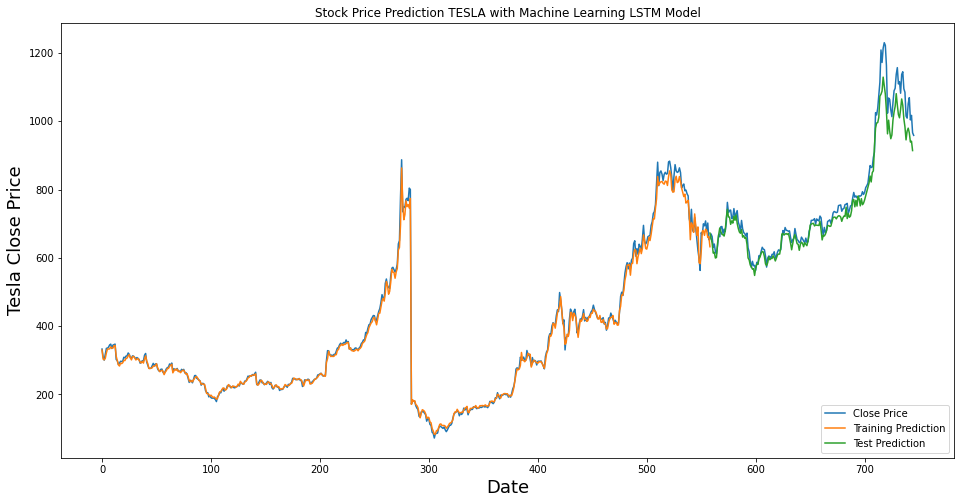

In [510]:
# train = close_values[0:training_data_size, 0:]
# valid.append(predictions)
#x_train = train setimiz, y_train
look_back = 7
plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction TESLA with Machine Learning LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Tesla Close Price', fontsize=18)
plt.plot(all_close_values)
plt.plot(train_predict)
plt.plot(np.arange(len(test_predict)) + len(all_close_values_train)-1, test_predict)
plt.legend(['Close Price', 'Training Prediction', 'Test Prediction'], loc='lower right')
plt.show()

 

# you seemed to mess up the labels

In [511]:
all_close_values

array([ 332.799988,  310.119995,  300.359985,  317.690002,  334.959991,
        335.350006,  338.529999,  344.970001,  347.26001 ,  334.399994,
        344.429993,  346.049988,  347.309998,  302.26001 ,  298.920013,
        287.589996,  291.51001 ,  297.040009,  296.380005,  297.459991,
        308.769989,  307.019989,  312.209991,  312.890015,  321.350006,
        317.220001,  307.51001 ,  305.799988,  312.839996,  311.809998,
        308.170013,  303.769989,  307.880005,  305.640015,  302.559998,
        291.230011,  294.709991,  298.769989,  297.859985,  314.73999 ,
        319.880005,  294.790009,  285.359985,  276.540009,  276.23999 ,
        276.589996,  284.140015,  290.920013,  283.359985,  288.959991,
        289.959991,  275.429993,  269.48999 ,  267.470001,  273.600006,
        274.019989,  264.529999,  260.420013,  267.769989,  274.829987,
        278.619995,  279.859985,  289.179993,  285.880005,  291.809998,
        267.779999,  274.959991,  273.200012,  272.309998,  276.

In [512]:
len(all_input_values)

746

In [513]:
all_input_values

array([[ 3.37790009e+02,  3.39209991e+02,  3.25260010e+02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.06100006e+02,  3.15130005e+02,  2.98799988e+02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.07000000e+02,  3.09399994e+02,  2.97380005e+02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.00875000e+03,  1.02097998e+03,  9.82530029e+02, ...,
         5.95344828e-01,  2.19166667e-01,  9.04100000e-01],
       [ 1.00109003e+03,  1.00500000e+03,  9.51419983e+02, ...,
         6.50000000e-01,  1.03409091e-01, -3.19700000e-01],
       [ 9.45000000e+02,  9.66409973e+02,  9.30000000e+02, ...,
         3.57913165e-01,  1.68137255e-01, -9.34900000e-01]])

In [514]:
close_values_input = all_close_values[739:].reshape(1,-1)

In [515]:
close_values_input.shape

(1, 7)

In [516]:
temp_input = list(close_values_input)

In [517]:
close_values_input

array([[1009.01001 , 1051.75    , 1068.959961, 1003.799988, 1017.030029,
         966.409973,  958.51001 ]])

In [518]:
temp_input = temp_input[0].tolist()

In [519]:
temp_input

[1009.01001,
 1051.75,
 1068.959961,
 1003.799988,
 1017.030029,
 966.409973,
 958.51001]

In [520]:
from numpy import array

In [521]:
close_values_input.shape

(1, 7)

In [522]:
len(temp_input)


7

In [523]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output = []
n_steps = 7
i = 0

while(i < 7):
    close_values_input = np.array(temp_input[i:])
    close_values_input=close_values_input.reshape(1,-1)
    print(close_values_input)
    close_values_input = close_values_input.reshape(1,1,n_steps)
    yhat = model.predict(close_values_input, verbose=0)
    print(yhat.shape)
    print(yhat[0][-1])  # yhat[0]= 9.10...


    i = i+1
    temp_input.extend(yhat[0][0].tolist())
    # temp_input = temp_input[i:]
    print(len(temp_input))
    lst_output.extend(yhat[0].tolist())
   

print(lst_output)


[[1009.01001  1051.75     1068.959961 1003.799988 1017.030029  966.409973
   958.51001 ]]
(1, 1, 1)
[9.552787]
7
[[1068.959961   1003.799988   1017.030029    966.409973    958.51001
     9.55278683]]


ValueError: cannot reshape array of size 6 into shape (1,1,7)

In [ ]:
l_list2[0][0]

array([1009.01001   , 1051.75      , 1068.959961  , 1003.799988  ,
       1017.030029  ,  966.409973  ,    9.40114689])

In [ ]:
l_list

[]

In [ ]:
x_input

array([[[1009.01001   , 1051.75      , 1068.959961  , 1003.799988  ,
         1017.030029  ,  966.409973  ,    9.40114689]]])

In [ ]:
x_input.shape

(1, 1, 7)

In [ ]:
x_input[0][0]

array([1009.01001   , 1051.75      , 1068.959961  , 1003.799988  ,
       1017.030029  ,  966.409973  ,    9.40114689])

In [ ]:
temp_input

[1009.01001,
 1051.75,
 1068.959961,
 1003.799988,
 1017.030029,
 966.409973,
 958.51001]

In [ ]:
yhat

array([[[9.401147]]], dtype=float32)

In [ ]:
yhat.shape

(1, 1, 1)